# First attempt at connecting V1 cells
4 neuron types (SST, PV, VIP, pyramidal) are modelled as leaky integrate-and-fire (LIF) neurons and connected as in Pakan et. al (2016) using Brian2.

In [2]:
from brian2 import *
prefs.codegen.target="numpy"

eqs = '''
dv/dt = (v0-v)/(R*C) + I/C : volt (unless refractory)
v0 : volt
I : amp
refperiod : second
C : farad
R : ohm
vt : volt
'''
# Neurons in order: VIP, SST, PV, pyramidal
G = NeuronGroup(4, eqs, threshold='v>vt', reset='v = 0*mV', refractory='refperiod', method='linear')
G.v0 = [0, 0, 0, 0]*mV
G.I = [100, 0, 0, 200]*pA
G.refperiod = [4.65,4.65,4.65,4.65]*ms
G.C = [75.492,75.492,75.492,75.492]*pfarad
G.R = [281,281,281,281]*Mohm
G.vt = [26.26,26.26,26.26,26.26]*mV

A layer 4 pyramidal cell was found modelled as a LIF neuron in the Allen Cell Types Database, and its parameters were used for all 4 cells in the circuit in lieu of easy LIF data for the others. A typical current input is applied to the pyramidal cell and current inputs can be altered for the other cells.

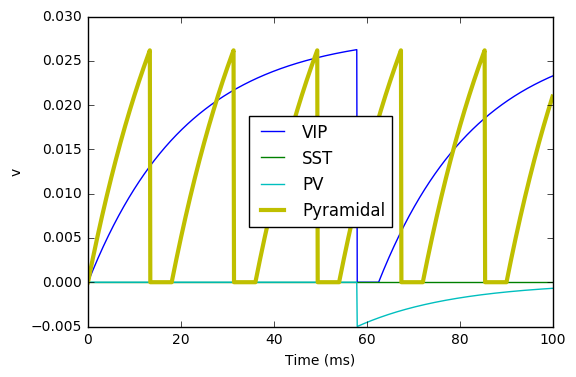

In [3]:
S = Synapses(G, G, on_pre='v_post -= 5*mV')
S.connect(i=0, j=2)
S.connect(i=1, j=[0,2,3])
S.connect(i=2, j=[2,3])

M = StateMonitor(G, 'v', record=True)

run(100*ms)

plot(M.t/ms, M.v[0], '-b', label='VIP')
plot(M.t/ms, M.v[1], '-g', label='SST')
plot(M.t/ms, M.v[2], '-c', label='PV')
plot(M.t/ms, M.v[3], '-y', lw=3, label='Pyramidal')
xlabel('Time (ms)')
ylabel('v')
legend(loc='best')
show()

Cells are connected as in connectivity diagram. No effect on pyramidal cells is seen without input to all inhibitory cells. Refractory periods are also likely to be different for different cells.